In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia_completo.pkl")
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")
df_final = pd.read_pickle("../data/final/hoteles_final.pkl")

# INSIGHTS

1. PRECIOS
2. VALORACION
3. VALORACIONS VS PRECIO
4. GENERAL
5. FECHAS
5. TOP 10

### 1. PRECIOS

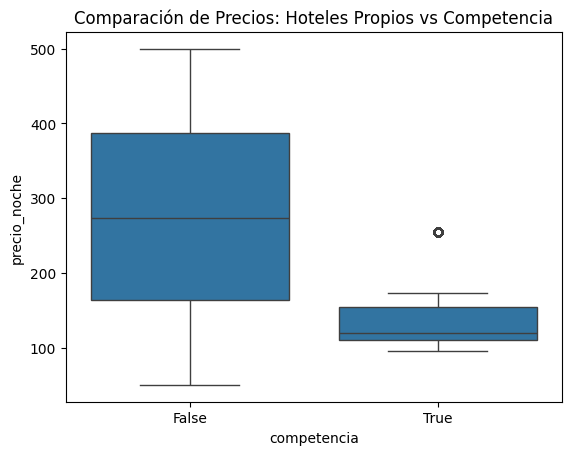

In [3]:
sns.boxplot(data=df_final, x="competencia", y="precio_noche")
plt.title("Comparación de Precios: Hoteles Propios vs Competencia")
plt.show()


In [4]:
# Crear boxplot con Plotly Express
fig = px.box(df_final, 
             x="competencia", 
             y="precio_noche",
             title="Comparación de Precios: Hoteles Propios vs Competencia",
             points="all")  # Mostrar todos los puntos atípicos

fig.update_layout(xaxis_title="Tipo de Hotel", 
                  yaxis_title="Precio por Noche",
                  legend_title="Competencia")

fig.show()


REVISAR CON LOS DATOS QUE SE MUESTRAN EN LOS TOOLTIPS: !!

- Competencia:  
    Sus precios son muchos más bajos y concentrados (110€-170€) con un outlier que ronda los 250€ (donde se encuentran la mayoría de nuestros hoteles).  

- Propios  

    Nuestros precios abarcan desde hoteles low cost de 50€ hasta hoteles de lujo de aprox 500€.  
    La dispersión es mayor (180€-390€).


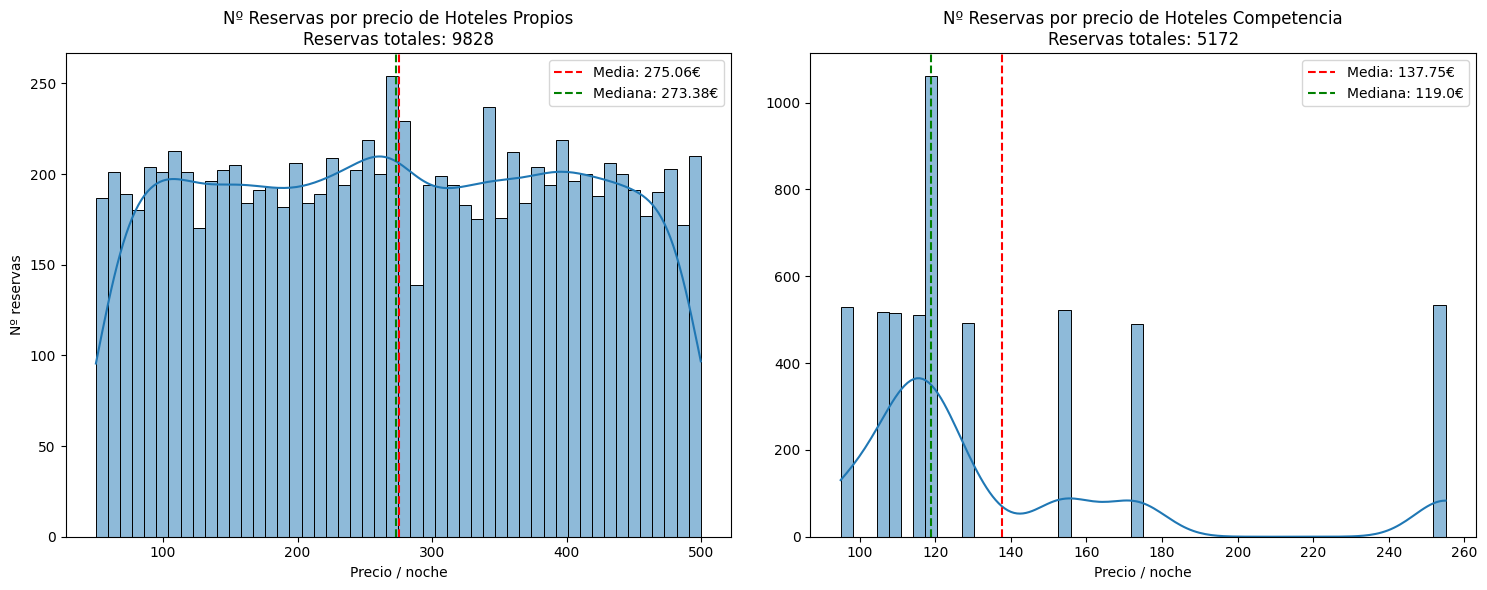

In [5]:
media_propios = np.mean(df_propios["precio_noche"])
mediana_propios = np.median(df_propios["precio_noche"])
reservas_totales_propios = df_propios.shape[0]

media_competencia = np.mean(df_competencia["precio_noche"])
mediana_competencia = np.median(df_competencia["precio_noche"])
reservas_totales_competencia = df_competencia.shape[0]


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.histplot(df_propios["precio_noche"], bins=50, kde=True, ax=axes[0])
axes[0].set_title(f"Nº Reservas por precio de Hoteles Propios\nReservas totales: {reservas_totales_propios}")
axes[0].set_xlabel("Precio / noche")
axes[0].set_ylabel("Nº reservas")
axes[0].axvline(media_propios, color="red", linestyle="dashed", label=f"Media: {round(media_propios, 2)}€")
axes[0].axvline(mediana_propios, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_propios, 2)}€")
axes[0].legend()


sns.histplot(df_competencia["precio_noche"], bins=50, kde=True, ax=axes[1])
axes[1].set_title(f"Nº Reservas por precio de Hoteles Competencia\nReservas totales: {reservas_totales_competencia}")
axes[1].set_xlabel("Precio / noche")
axes[1].set_ylabel(" ")
axes[1].axvline(media_competencia, color="red", linestyle="dashed", label=f"Media: {round(media_competencia, 2)}€")
axes[1].axvline(mediana_competencia, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_competencia, 2)}€")
axes[1].legend()


plt.tight_layout()
plt.show()



Los hoteles propios de media tienen precios por noche práctimente el doble de altos que los de la comeptencia. Pero a pesar de tener precios más elevados, los hoteles propios han recibido casi el doble de reservas (+90%) que los de la competencia.

Las reservas en nuestros hoteles están mucho más distribuidas que en los de la competencia, donde más de 1000 de sus reservas (aprox 20%) se concentran en hoteles con un precio de 120€/noche. En nuestro caso, la mayor concentración de reservas resulta en un 2.5% del total a un precio de 275€/noche.

**CONCLUSIÓN**  
Los hoteles propios tienen precios más elevados pero aún así consiguen más reservas. Esto sugiere que:
- A: El valor percibido de estos hoteles justifica el precio más alto, lo que intentaremos corroborar más adelante.
- B: Si las valoraciones de nuestros clientes a nuetros hoteles son más bajas que los de la competencia, podría indicar que nuestro público objetivo es diferente: quizá con un poder adquisitivo mayor que no le importa pagar de más, por ejemplo por reservar con menos antelación debido a que viajan por negocio en vez de por ocio.

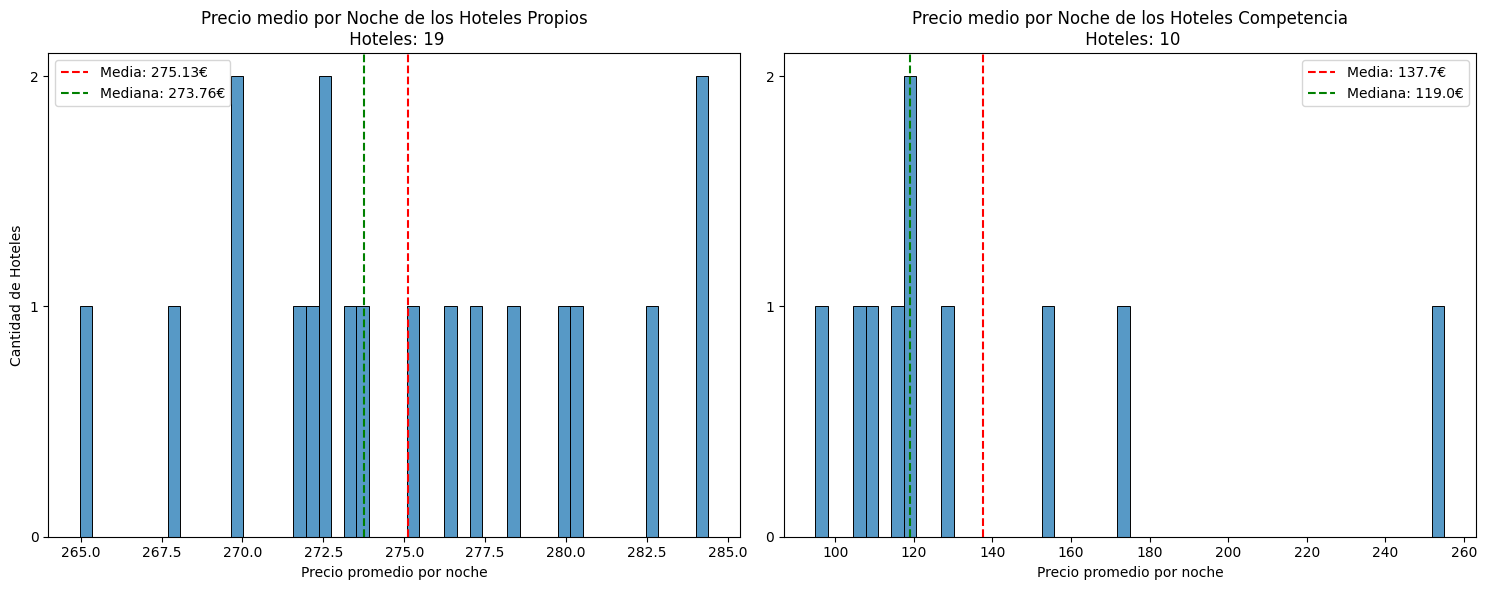

In [6]:
df_media_precio_hoteles_propios = df_propios.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_propios = df_media_precio_hoteles_propios.shape[0]
media_precio_propios = df_media_precio_hoteles_propios["precio_noche"].mean()
mediana_precio_propios = df_media_precio_hoteles_propios["precio_noche"].median()

df_media_precio_hoteles_competencia = df_competencia.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_competencia = df_media_precio_hoteles_competencia.shape[0]
media_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].mean()
mediana_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].median()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_precio_hoteles_propios["precio_noche"], bins=50, ax=axes[0])
axes[0].set_title(f"Precio medio por Noche de los Hoteles Propios\n Hoteles: {total_hoteles_propios}")
axes[0].set_xlabel("Precio promedio por noche")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_precio_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_propios, 2)}€"))
axes[0].axvline(mediana_precio_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_propios, 2)}€"))
axes[0].set_yticks(np.arange(0, 3, 1))
axes[0].legend()

sns.histplot(df_media_precio_hoteles_competencia["precio_noche"], bins=50, ax=axes[1])
axes[1].set_title(f"Precio medio por Noche de los Hoteles Competencia\n Hoteles: {total_hoteles_competencia}")
axes[1].set_xlabel("Precio promedio por noche")
axes[1].set_ylabel("")
axes[1].axvline(media_precio_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_competencia, 2)}€"))
axes[1].axvline(mediana_precio_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_competencia, 2)}€"))
axes[1].set_yticks(np.arange(0, 3, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


El precio prmedio el hotel más caro de la competencia no llega al precio prmedio del hotel propio más barato.   
La diferencia de precios en los hoteles propios en escasa: 20€ desde el hotel con la media por noche más baja al hotel con la media por noche más alta.  
De hecho, casi el 60% de nuestros hoteles estan en un precio noche promedio de 10€ de diferencia (270€-280€).

### 2. VALORACION

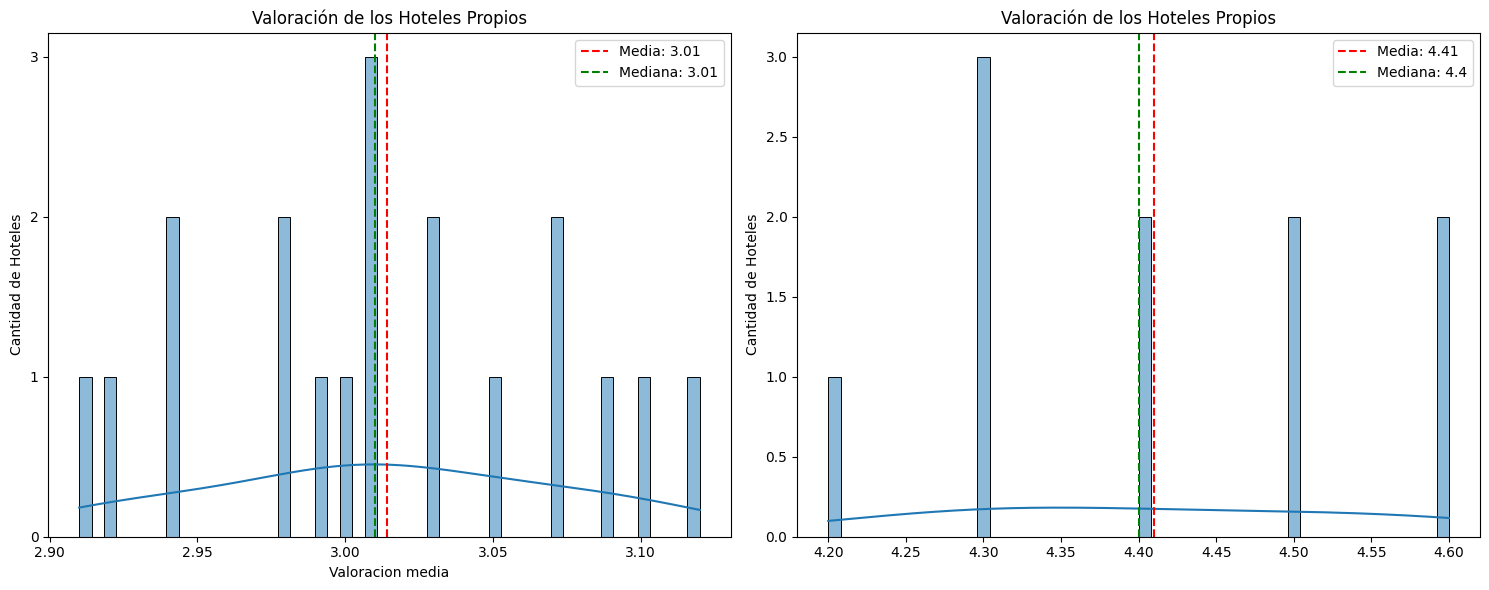

In [7]:
df_media_val_hoteles_propios = df_propios.groupby("nombre_hotel")["valoracion"].mean().reset_index()
df_media_val_hoteles_competencia = df_competencia.groupby("nombre_hotel")["valoracion"].mean().reset_index()

media_valoracion_propios = np.mean(df_propios["valoracion"])
mediana_valoracion_propios = np.median(df_propios["valoracion"])


media_valoracion_competencia = np.mean(df_competencia["valoracion"])
mediana_valoracion_competencia = np.median(df_competencia["valoracion"])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_val_hoteles_propios["valoracion"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Valoración de los Hoteles Propios")
axes[0].set_xlabel("Valoracion media")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_valoracion_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_propios, 2)}"))
axes[0].axvline(mediana_valoracion_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_propios, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[0].legend()

sns.histplot(df_media_val_hoteles_competencia["valoracion"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Valoración de los Hoteles Propios")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Cantidad de Hoteles")
axes[1].axvline(media_valoracion_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_competencia, 2)}"))
axes[1].axvline(mediana_valoracion_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_competencia, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


- Nuestros hoteles tienen menos valoración de media que los de la competencia.  
- Al contrario que con los precios medios por noche, la valoración media de nuestro mejor hotel es 1 punto menor que la valoracion media del peor hotel de la competencia.  
- Esto es preocupante porque nuestros precios son el doble de altos pero sin embargo nuestros clientes no están igual de satisfetos que los clientes de la competencia con precios la mitad de caros.
- Si los nuestros hoteles siguen manteniendo precios altos con menor valoración que la competencia podrían perder clientes.


### 3. VALORACION-PRECIO Propios VS Competencia

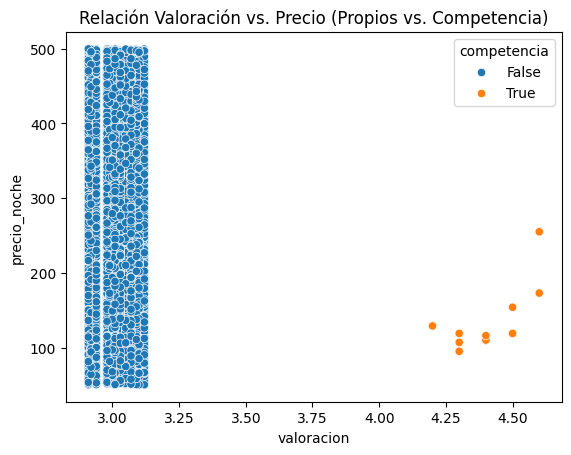

In [8]:
sns.scatterplot(data=df_final, x="valoracion", y="precio_noche", hue="competencia")
plt.title("Relación Valoración vs. Precio (Propios vs. Competencia)")
plt.show()


Podemos observar que en los propios hay hoteles de 50€ y de 500€ que tienen la misma valoración.   
No hay una correlación fuerte entre el precio por noche y la valoración de los clientes.  
Esto deberíamos revisarlo y ver por qué los clientes no tienen una percepción asociada al nivel de precios. 

### 4. HOTELES GENERAL

PODRÍAMOS EXTRAER CONCLUSIONES DEL SECTOR HOTELERO SI ACEPTÁRAMOS QUE TODOS LOS HOTELES DE DF_FINAL FEURAN TODOS LOS HOTELES DEL SECTOR

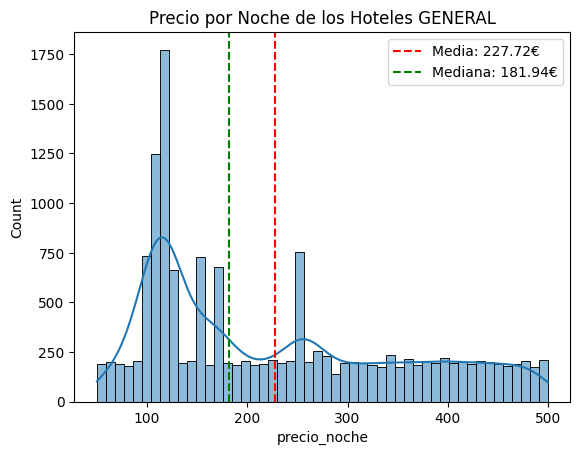

In [9]:
media = np.mean(df_final["precio_noche"])
mediana = np.median(df_final["precio_noche"])

sns.histplot(df_final["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}€"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}€"))
plt.legend()
plt.show()

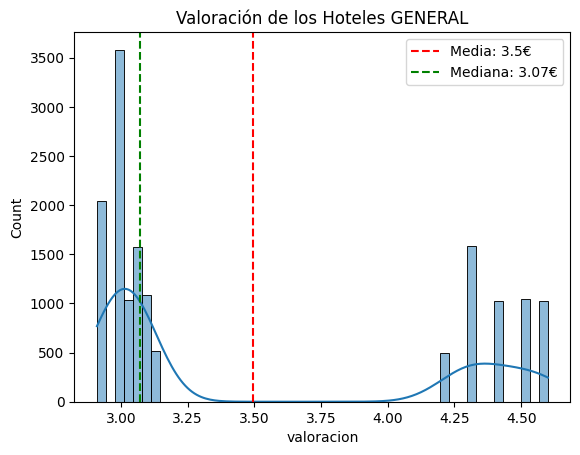

In [10]:
media = np.mean(df_final["valoracion"])
mediana = np.median(df_final["valoracion"])

sns.histplot(df_final["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}€"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}€"))
plt.legend()
plt.show()

### 5. RESERVAS

In [55]:

reservas_por_dia = df_final.groupby("fecha_reserva",)["id_reserva"].count().reset_index()
fig = px.line(reservas_por_dia, 
              x="fecha_reserva", 
              y="id_reserva", 
              title="Evolución de Reservas en el Tiempo",
              labels={"fecha_reserva": "Fecha de Reserva", "id_reserva": "Número de Reservas"})

fig.show()

In [12]:
fig = px.histogram(df_final, 
                   x="fecha_reserva", 
                   color="competencia",  # Equivalente a hue en Seaborn
                   nbins=30, 
                   title="Distribución de Reservas por Fecha según Competencia")

fig.update_layout(xaxis_title="Fecha de Reserva", 
                  yaxis_title="Nº Reservas",
                  legend_title="Competencia")

fig.show()


VISUALIZAR DIFERENCIA DIA RESERVA ENTRE PROPIOS Y COMPETENCIA

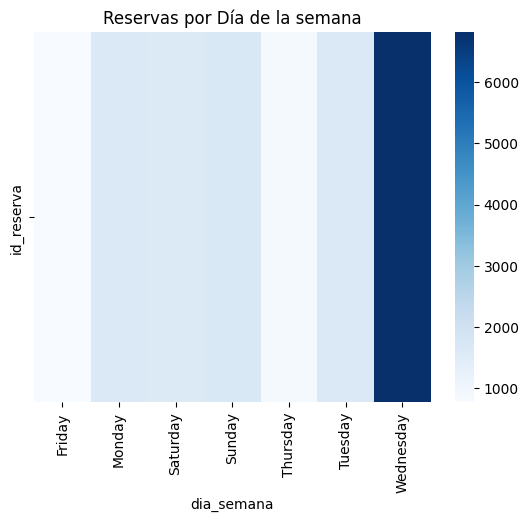

In [13]:
df_final["dia_semana"] = df_final["fecha_reserva"].dt.day_name()
pivot_data = df_final.pivot_table(columns="dia_semana", values="id_reserva", aggfunc="count")
sns.heatmap(pivot_data, cmap="Blues")
plt.title("Reservas por Día de la semana")
plt.show()


### 6. TOP 10

In [14]:
df_final["ingreso_reserva"] = df_final["precio_noche"] * (df_final["final_estancia"] - df_final["inicio_estancia"]).dt.days

VERIFICAR SI LOS 10 HOTELES SON PROPIOS O DE LA COMPETENCIA

In [51]:
ingresos_hoteles = df_final.groupby(["nombre_hotel", "competencia"])["ingreso_reserva"].sum().reset_index()

ingresos_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=False).head(10)

fig = px.bar(ingresos_hoteles, 
             x="ingreso_reserva", 
             y="nombre_hotel", 
             orientation='h',  # Barras horizontales
             title="Top 10 Hoteles por Ingresos",
             labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
             color_discrete_map={True: "blue", False: "lightgreen"}  
            )

fig.show()


VISUALIZAR TOP 5 HOTELES POR INGRESO DE LA COMPETENCIA

ASIGNAR UNA CATEGORÍA EN FUNCIÓN DE LOS INGRESOS DE CLIENTE (COLUMNA NUEVA:  GASTO ALTO, GASTO MEDIO, GASTO BAJO...) Y VER QUÉ TIPO DE CLIENTES PREDOMINAN EN LOS HOTELES DE LA COMPETENCIA Y LOS NUESTROS

In [41]:
gasto_por_cliente = df_final.groupby("id_cliente")["ingreso_reserva"].sum().reset_index()

top_10_clientes = gasto_por_cliente.sort_values(by="ingreso_reserva", ascending=False).head(10)

fig = px.bar(
    top_10_clientes, 
    x="ingreso_reserva", 
    y=top_10_clientes["id_cliente"].astype(str),  # Convertir ID a string para evitar errores en el eje Y
    orientation="h",  
    title="Top 10 Clientes por Ingreso",
    labels={"ingreso_reserva": "Ingreso €", "id_cliente": "ID Cliente"},
    color="ingreso_reserva",  # Dar color en función del ingreso
    color_continuous_scale="Greens"  # Escala de colores
)

fig.show()


COMPROBAR SI HAY CLIENTES QUE HAN RESERVADO EN HOTELES PROPIOS Y DE LA COMPETENCIA PARA LA MISMA FECHA

SI LOS HAY, VER QUÉ TIPO DE CLIENTES SON Y SI, POR SU TIPO Y POR EL HOTEL EN EL QUE HAN RESERVADO, ES MÁS PROBABLE QUE NOS CANCELES LA RESERVA A NOSOTROS O A LA COMPETENCIA.

In [17]:
# df_final.drop(columns="ingreso_reserva", inplace=True)

In [27]:
# Contar cuántas reservas tiene cada cliente en hoteles propios y de la competencia
clientes_reservas = df_final.groupby(["id_cliente"])["competencia"].nunique().reset_index()

# Filtrar clientes que han reservado en ambos tipos de hoteles
clientes_ambos = clientes_reservas[clientes_reservas["competencia"] > 1]

# Mostrar resultado
print(f"Cantidad de clientes que han reservado en ambos tipos de hoteles: {clientes_ambos.shape[0]}")



Cantidad de clientes que han reservado en ambos tipos de hoteles: 40


In [ ]:
ingresos_por_cliente = df_final.groupby("id_cliente")["ingreso_reserva"].sum().reset_index()

# Renombrar la columna para mayor claridad
ingresos_por_cliente.rename(columns={"ingreso_reserva": "ingreso_total_cliente"}, inplace=True)

ingresos_por_cliente


,id_cliente,ingreso_total_cliente
0,1,179.87
1,2,360.96
2,3,429.09
3,4,372.10
4,5,253.69
...,...,...
14900,14901,436.38
14901,14902,284.40
14902,14903,174.76
14903,14904,152.96


In [ ]:
# Unir los ingresos de cada cliente al DataFrame clientes_ambos
clientes_ambos = clientes_ambos.merge(ingresos_por_cliente, on="id_cliente", how="left")

# Mostrar los primeros resultados
clientes_ambos


C:\Users\victo\AppData\Local\Temp\ipykernel_32572\3296589560.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,id_cliente,competencia,ingreso_total_cliente
0,246,2,659.63
1,410,2,293.18
2,650,2,444.07
3,1242,2,559.03
4,2832,2,395.64
5,2896,2,430.80
6,3742,2,327.89
7,5033,2,456.79
8,5507,2,565.79
9,5619,2,182.99


In [22]:
# Contar clientes en cada categoría
conteo_tipos = clientes_reservas["competencia"].value_counts().reset_index()
conteo_tipos.columns = ["Tipo de Cliente", "Cantidad"]

# Renombrar valores (1 = Solo en un tipo, 2 = En ambos tipos)
conteo_tipos["Tipo de Cliente"] = conteo_tipos["Tipo de Cliente"].map({1: "Solo en un tipo", 2: "Ambos tipos"})

# Gráfico de torta
fig = px.pie(conteo_tipos, values="Cantidad", names="Tipo de Cliente", title="Clientes por Tipo de Reserva", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


In [23]:
df_final.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'valoracion', 'ciudad', 'id_ciudad',
       'dia_semana', 'ingreso_reserva'],
      dtype='object')